In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.10.0


In [2]:
# Create a list with the filepaths for training dataset
train_dir = Path("C:\\Users\\narma\\Desktop\\final\\dataset\\train")
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [3]:
# Create a list with the filepaths for testing dataset
test_dir = Path("C:\\Users\\narma\\Desktop\\final\\dataset\\test")
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [4]:
# Create a list with the filepaths for validation dataset
val_dir = Path("C:\\Users\\narma\\Desktop\\final\\dataset\\validation")
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [11]:
print('Training folder:')
train_fv_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)
print('\n')

print('Validation folder:')
valid_fv_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               shuffle=False,
                                                               batch_size=batch_size)
print('\n')

print('Testing folder:')
test_fv_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              seed=2509,
                                                              image_size=(img_height, img_width),
                                                              shuffle=False,
                                                              batch_size=batch_size)

Training folder:
Found 3115 files belonging to 36 classes.


Validation folder:
Found 351 files belonging to 36 classes.


Testing folder:
Found 359 files belonging to 36 classes.


In [12]:
class_names = train_fv_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


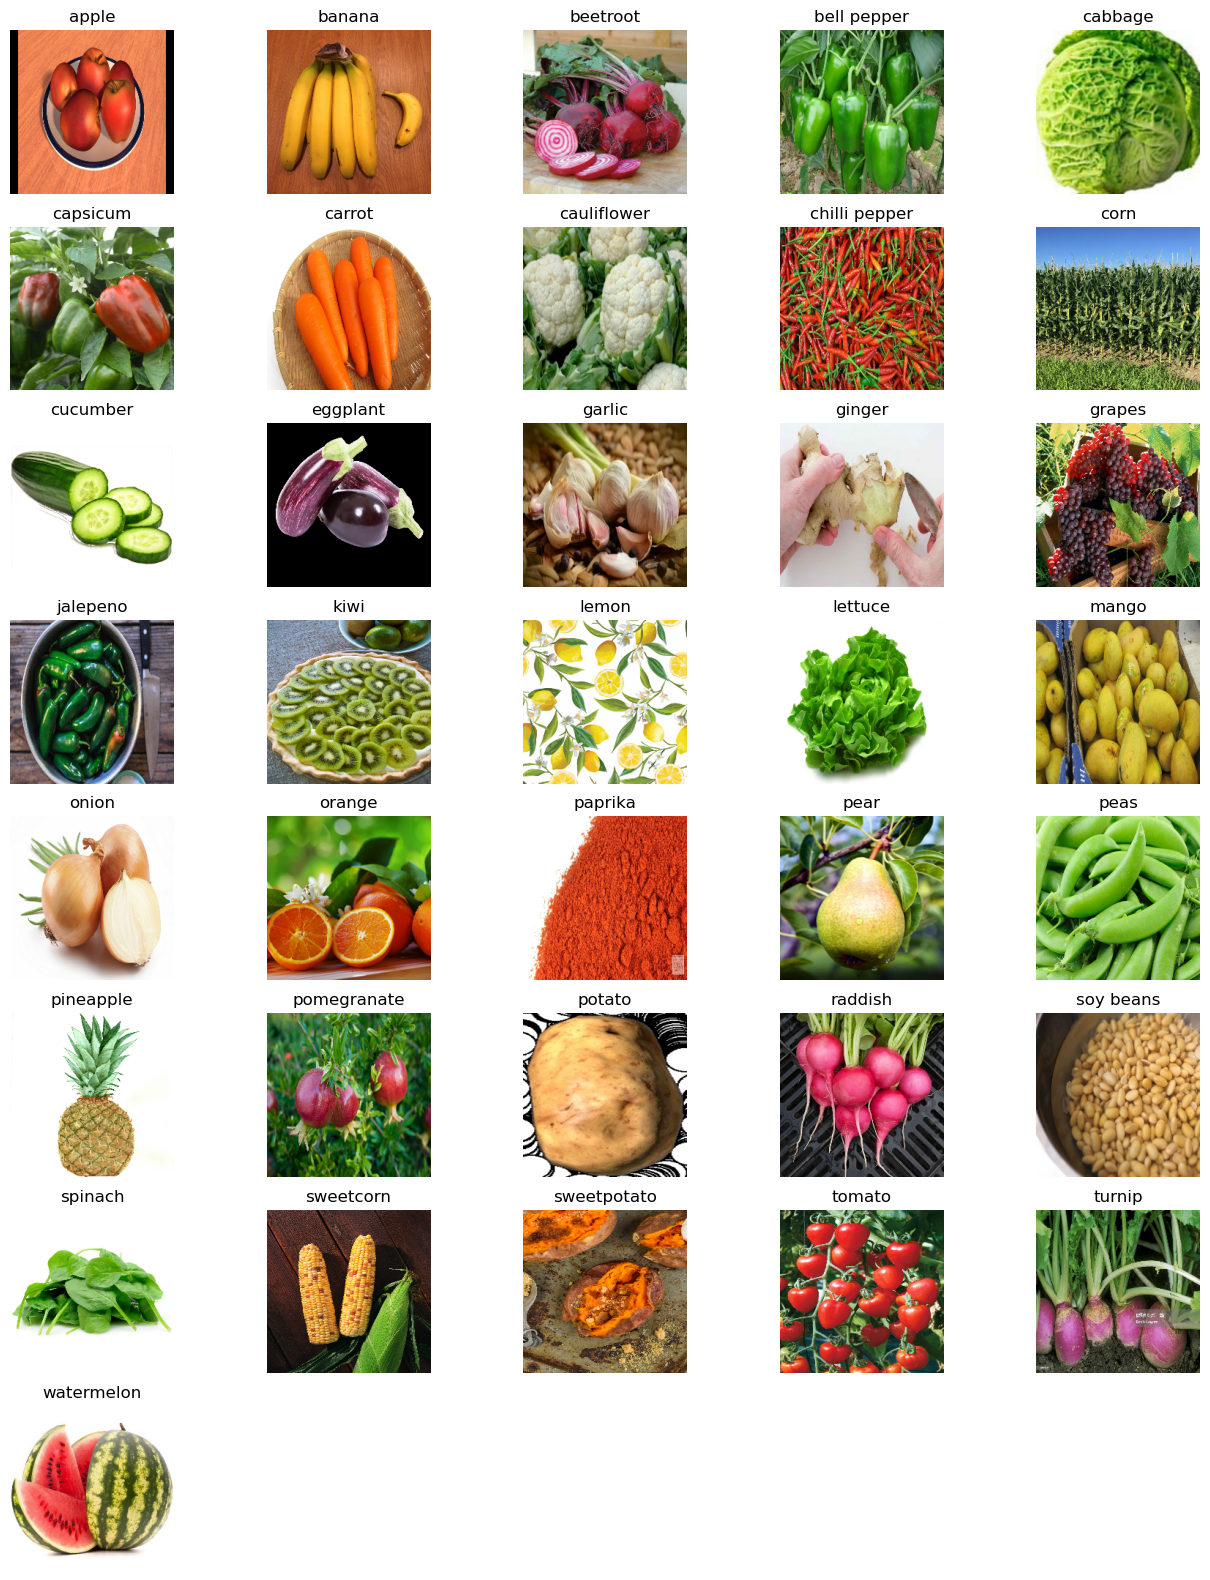

In [13]:
import matplotlib.pyplot as plt
import random

# Create a list of unique labels/classes
unique_labels = list(set(class_names))

# Sort the unique labels in alphabetical order
unique_labels.sort()

# Iterate through the dataset and display one image from each class
plt.figure(figsize=(16, 20))  # Adjust the figsize as needed
image_count = 0  # Variable to track the number of displayed images

for images, labels in train_fv_ds:
    for image, label in zip(images, labels):
        if class_names[label] == unique_labels[image_count]:
            ax = plt.subplot(8, 5, image_count + 1)  # Modify the subplot parameters
            plt.imshow(image.numpy().astype("uint8"))
            plt.title(class_names[label])
            plt.axis("off")
            image_count += 1
            break
    if image_count >= 36:
        break

plt.show()

In [14]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [15]:
base_model.trainable = False

In [16]:
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [17]:
inputs = tf.keras.Input(shape=(224,224,3))
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dense(len(class_names),activation='softmax')(x)

In [18]:
model = tf.keras.Model(inputs=inputs, outputs=x, name="flower_vegetable_Detection_MobileNetV2")

In [19]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

C:\Users\narma\anaconda3\envs\hia122\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
model.summary()

Model: "flower_vegetable_Detection_MobileNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)          

In [21]:
initial_epochs = 5
# Fit the model
history = model.fit(x=train_fv_ds,
                    epochs= initial_epochs,
                    validation_data=valid_fv_ds)

Epoch 1/5
98/98 [==============================] - 160s 1s/step - loss: 1.4838 - accuracy: 0.5753 - val_loss: 0.5857 - val_accuracy: 0.7835
Epoch 2/5
98/98 [==============================] - 150s 2s/step - loss: 0.7763 - accuracy: 0.7506 - val_loss: 0.4048 - val_accuracy: 0.8547
Epoch 3/5
98/98 [==============================] - 149s 1s/step - loss: 0.5841 - accuracy: 0.8032 - val_loss: 0.3698 - val_accuracy: 0.8632
Epoch 4/5
98/98 [==============================] - 149s 1s/step - loss: 0.5040 - accuracy: 0.8305 - val_loss: 0.2852 - val_accuracy: 0.9031
Epoch 5/5
98/98 [==============================] - 148s 1s/step - loss: 0.3931 - accuracy: 0.8584 - val_loss: 0.2872 - val_accuracy: 0.9031


In [22]:
base_model.trainable = True

In [23]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(1e-5),
    metrics = ["accuracy"])

In [24]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_fv_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_fv_ds)

Epoch 5/10
98/98 [==============================] - 334s 3s/step - loss: 0.2614 - accuracy: 0.9108 - val_loss: 0.2422 - val_accuracy: 0.9231
Epoch 6/10
98/98 [==============================] - 334s 3s/step - loss: 0.2171 - accuracy: 0.9213 - val_loss: 0.2255 - val_accuracy: 0.9288
Epoch 7/10
98/98 [==============================] - 319s 3s/step - loss: 0.1974 - accuracy: 0.9287 - val_loss: 0.2345 - val_accuracy: 0.9288
Epoch 8/10
98/98 [==============================] - 310s 3s/step - loss: 0.1656 - accuracy: 0.9396 - val_loss: 0.2089 - val_accuracy: 0.9288
Epoch 9/10
98/98 [==============================] - 306s 3s/step - loss: 0.1563 - accuracy: 0.9486 - val_loss: 0.2031 - val_accuracy: 0.9345
Epoch 10/10
98/98 [==============================] - 336s 3s/step - loss: 0.1641 - accuracy: 0.9400 - val_loss: 0.1979 - val_accuracy: 0.9402


In [25]:
# Predict the label of the test_images
pred = model.predict(test_fv_ds)
pred = np.argmax(pred,axis=1)

# Create a list of class labels based on the subdirectories in the training folder
class_labels = train_fv_ds.class_names

# Create a dictionary to map class indices to class labels
labels = {i: label for i, label in enumerate(class_labels)}

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred]

# Print the predicted labels
print(pred_labels)

12/12 [==============================] - 17s 1s/step
['apple', 'apple', 'apple', 'apple', 'apple', 'capsicum', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'jalepeno', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'beetroot', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'cabbage', 'capsicum', 'capsicum', 'capsicum', 'capsicum', 'capsicum', 'bell pepper', 'bell pepper', 'bell pepper', 'bell pepper', 'capsicum', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'carrot', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 'cauliflower', 

In [27]:
def output(location):
    img = tf.keras.preprocessing.image.load_img(location, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)

    answer = model.predict(img)
    y_class = np.argmax(answer, axis=-1)
    y = int(y_class)
    res = labels[y]
    return res

In [28]:
img = output("C:\\Users\\narma\\Desktop\\final\\dataset\\train\\pomegranate\\Image_11.jpg")
img

1/1 [==============================] - 2s 2s/step


'soy beans'

In [29]:
img = output("C:\\Users\\narma\\Desktop\\final\\dataset\\train\\watermelon\\Image_14.jpeg")
img

1/1 [==============================] - 0s 94ms/step


'soy beans'